<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Momentum_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
# import necessary packages
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_datareader.data as reader
import datetime as dt
from pandas.tseries.offsets import MonthEnd

In [65]:
symbols=pd.read_csv('https://raw.githubusercontent.com/anirbanghoshsbi/nifty500/main/ind_nifty500list.csv')

In [66]:
symbols['data']=symbols.Symbol+'.NS'


In [67]:
ticker=symbols.data.tolist()

In [68]:
# Get ticker symbol for NSE 50 stocks
#symbols=pd.read_html('https://in.finance.yahoo.com/quote/%5ENSEI/components?p=%5ENSEI')[0]
#ticker=symbols.Symbol.to_list()


In [69]:
#symbols=pd.read_html('https://www.moneycontrol.com/financials/tatasteel/balance-sheetVI/TIS#TIS')

In [70]:
#symbols[0]

In [71]:
#Get the NSE Component prices
start_date = dt.datetime(2018,1,31)
end_date= dt.datetime(2022,7,31)
df =yf.download(ticker,start_date,end_date)['Adj Close']

[*********************100%***********************]  501 of 501 completed

8 Failed downloads:
- WABCOINDIA.NS: No data found, symbol may be delisted
- SUPPETRO.NS: No data found, symbol may be delisted
- ANGELBRKG.NS: No data found, symbol may be delisted
- BURGERKING.NS: No data found, symbol may be delisted
- PHILIPCARB.NS: No data found, symbol may be delisted
- ORIENTREF.NS: No data found, symbol may be delisted
- MOTHERSUMI.NS: No data found, symbol may be delisted
- CADILAHC.NS: No data found, symbol may be delisted


In [72]:
df.to_csv('data_500.csv')

In [73]:
# Get daily return and then cummulate it to monthly/Quartelry/Half yealrly /Annually return
monthly_return = df.pct_change().resample('M').agg(lambda x:(x+1).prod()-1)
#quarterly_return = df.pct_change().resample('Q').agg(lambda x:(x+1).prod()-1)
#halfyearly_return = df.pct_change().resample('H').agg(lambda x:(x+1).prod()-1)
#annual_return= df.pct_change().resample('Y').agg(lambda x:(x+1).prod()-1)


In [74]:
#Calculate returns over last 11 months to 6 months
past_11 = (monthly_return+1).rolling(11).apply(np.prod)-1
past_10 = (monthly_return+1).rolling(10).apply(np.prod)-1
past_9 = (monthly_return+1).rolling(9).apply(np.prod)-1
past_8 = (monthly_return+1).rolling(8).apply(np.prod)-1
past_7 = (monthly_return+1).rolling(7).apply(np.prod)-1
past_6 = (monthly_return+1).rolling(6).apply(np.prod)-1

In [75]:
#past_q_1= (quarterly_return+1).rolling(3).apply(np.prod)-1
#past_q_2= (quarterly_return+1).rolling(6).apply(np.prod)-1
#past_q_3= (quarterly_return+1).rolling(9).apply(np.prod)-1

In [76]:
formation=dt.datetime(2022,8,31)

In [77]:
from pandas.tseries.offsets import MonthEnd
end_measurement11= formation- MonthEnd(1)
end_measurement10 = formation-MonthEnd(2)

end_measurement09 = formation-MonthEnd(3)
end_measurement08 = formation-MonthEnd(4)
end_measurement07 = formation-MonthEnd(5)
end_measurement06 = formation-MonthEnd(6)

In [78]:
end_measurement11

Timestamp('2022-07-31 00:00:00')

In [79]:
past_11.tail(2)

,3MINDIA.NS,AARTIDRUGS.NS,AARTIIND.NS,AAVAS.NS,ABB.NS,ABBOTINDIA.NS,ABCAPITAL.NS,ABFRL.NS,ACC.NS,ADANIENT.NS,...,WELCORP.NS,WELSPUNIND.NS,WESTLIFE.NS,WHIRLPOOL.NS,WIPRO.NS,WOCKPHARMA.NS,YESBANK.NS,ZEEL.NS,ZENSARTECH.NS,ZYDUSWELL.NS
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-30,-0.113818,-0.393730,-0.249790,-0.200757,0.360923,-0.013273,-0.227979,0.057079,-0.089114,0.542616,...,0.677289,-0.478468,-0.112361,-0.289168,-0.284345,-0.605915,-0.007843,0.071387,-0.340251,-0.235474
2022-07-31,-0.067591,-0.318829,-0.165336,-0.010063,0.450529,0.038553,-0.013908,0.290966,-0.051415,0.618980,...,0.940923,-0.448784,0.061302,-0.164788,-0.332361,-0.454602,0.384259,0.459969,-0.437933,-0.298517


In [80]:
ret_12 = past_11.loc[end_measurement11]

In [81]:
ret_11 = past_10.loc[end_measurement10]
ret_10 = past_9.loc[end_measurement09]
ret_09 = past_8.loc[end_measurement08]
ret_08 = past_7.loc[end_measurement07]
ret_07 = past_6.loc[end_measurement06]


In [82]:
ret_12=ret_12.reset_index()
ret_11=ret_11.reset_index()
ret_10=ret_10.reset_index()
ret_09=ret_09.reset_index()
ret_08=ret_08.reset_index()
ret_07=ret_07.reset_index()

In [83]:
ret_12['quintile'] = pd.qcut(ret_12.iloc[:,1],10,labels=False)
ret_11['quintile'] = pd.qcut(ret_11.iloc[:,1],10,labels=False)
ret_10['quintile'] = pd.qcut(ret_10.iloc[:,1],10,labels=False)
ret_09['quintile'] = pd.qcut(ret_09.iloc[:,1],10,labels=False)
ret_08['quintile'] = pd.qcut(ret_08.iloc[:,1],10,labels=False)
ret_07['quintile'] = pd.qcut(ret_07.iloc[:,1],10,labels=False)

In [84]:
winners12= ret_12[ret_12.quintile==9]
winners11= ret_11[ret_11.quintile==9]
winners10= ret_10[ret_10.quintile==9]
winners9= ret_09[ret_09.quintile==9]
winners08= ret_08[ret_08.quintile==9]
winners07= ret_07[ret_07.quintile==9]

In [85]:
# Getting Common Winners

from functools import reduce # python 3 only
final_winner=reduce(np.intersect1d, [winners12.index,winners11.index,\
                                      winners10.index,winners9.index,\
                                      winners08.index,winners07.index])

final_winner=final_winner.tolist()

In [86]:
cols=[]
for ind in final_winner:
  print(df.columns[ind])
  cols.append(df.columns[ind])

ADANIGREEN.NS
CHALET.NS
FLUOROCHEM.NS
GNFC.NS
GUJALKALI.NS
INDHOTEL.NS
INGERRAND.NS
INOXLEISUR.NS
KPITTECH.NS
KPRMILL.NS
MAHSEAMLES.NS
MINDACORP.NS
RAYMOND.NS
SHARDACROP.NS
SHOPERSTOP.NS
SOLARINDS.NS
TATAELXSI.NS
TATAMOTORS.NS
TATAMTRDVR.NS
TATAPOWER.NS
TRIDENT.NS


In [88]:
(df['2020-03-30':'2020-03-30']['AAVAS.NS'][0]-df['2020-02-28':'2020-02-28']['AAVAS.NS'][0])/df['2020-02-28':'2020-02-28']['AAVAS.NS'][0]

-0.4031721584176865

In [90]:
features={'scripname':cols}
final_data=pd.DataFrame(features)

In [91]:
final_data['Date']=formation

In [92]:
final_data.to_csv('data.csv')

In [93]:
len(cols)

21

In [94]:
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [95]:
 imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [96]:
imp_mean.fit(df[cols])

SimpleImputer()

In [97]:
data_imputed=imp_mean.fit_transform(df[cols])

In [98]:
pca=PCA(1).fit(data_imputed.T)

In [99]:
index=pca.components_[0].T

In [100]:
final=pd.DataFrame({'Date':df.index,'Index_Value':index})

In [101]:
final=final.set_index('Date')

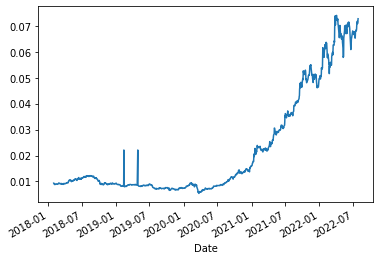

In [102]:
final['Index_Value'].plot();

In [103]:
stock_data=pd.DataFrame({'stockname':cols,'ROE':np.nan,'Debt_to_Equity':np.nan,'CFO':np.nan,'Earnings':np.nan})

In [104]:
stock_data.head(2)

,stockname,ROE,Debt_to_Equity,CFO,Earnings
0,ADANIGREEN.NS,NaN,NaN,NaN,NaN
1,CHALET.NS,NaN,NaN,NaN,NaN


In [105]:
lst=['ADANIENT.NS','ADANITRANS.NS','ALKYLAMINE.NS','ATGL.NS','BALAMINES.NS','DEEPAKNTR.NS','GRAPHITE.NS','HAPPSTMNDS.NS','HEG.NS','HINDCOPPER.NS','IIFL.NS','INTELLECT.NS','KPITTECH.NS','MMTC.NS','NATIONALUM.NS','PRINCEPIPE.NS','SAIL.NS','SUPPETRO.NS','TATAELXSI.NS','TATASTEEL.NS','VEDL.NS']

In [106]:
start_date = dt.datetime(2021,1,1)
end_date= dt.datetime(2021,12,11)
df =yf.download(lst,start_date,end_date)['Adj Close']

[*********************100%***********************]  21 of 21 completed

1 Failed download:
- SUPPETRO.NS: No data found, symbol may be delisted


In [107]:
def cal_fin_index(lst,df):
  i=0
  diction={}
  for item in lst:
    var = str(item)+'_i'
    #print(df[item].head(1))
    df[var]=df[item].transform(lambda x : np.sign(x.diff(1)))
    #print(df[var].head(2))
    percent_positive=len(df[df[var]==1])/len(df)
    percent_negative=len(df[df[var]==0])/len(df)
    yearly_return=(df[item].iloc[-1]-df[item].iloc[0])/df[item].iloc[0]
    dummy=yearly_return*(percent_negative-percent_positive)
    diction[var]=dummy
    i=i+1
  return diction

In [108]:
diction=cal_fin_index(lst,df)

In [109]:
#a = {k: v for k, v in sorted(diction.items(), key=lambda x: x[1])}
print(sorted(diction.items(), key =lambda kv:(kv[1], kv[0])))   


[('ATGL.NS_i', -2.2604042972046132), ('ADANITRANS.NS_i', -1.8500991414069814), ('HAPPSTMNDS.NS_i', -1.48035497506676), ('ADANIENT.NS_i', -1.453223414286331), ('KPITTECH.NS_i', -1.3474496775434164), ('BALAMINES.NS_i', -1.274326582898597), ('TATAELXSI.NS_i', -1.1959546895378075), ('IIFL.NS_i', -0.7771027748206992), ('VEDL.NS_i', -0.7351527267013571), ('NATIONALUM.NS_i', -0.7267953212228973), ('DEEPAKNTR.NS_i', -0.7063678109598441), ('PRINCEPIPE.NS_i', -0.6490421367003033), ('INTELLECT.NS_i', -0.6300357087396453), ('ALKYLAMINE.NS_i', -0.5008928964596459), ('HINDCOPPER.NS_i', -0.48281822472804325), ('TATASTEEL.NS_i', -0.4811941785703881), ('HEG.NS_i', -0.4420191458948865), ('SAIL.NS_i', -0.3072284979893144), ('MMTC.NS_i', -0.2298589714606944), ('GRAPHITE.NS_i', -0.1981232089914632), ('SUPPETRO.NS_i', nan)]
